In [1]:
import pandas as pd
import numpy as np
# import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Telco_customer_churn_cleaned.csv')

In [3]:
data_best = pd.read_csv('best_case_final.csv')
data_worst = pd.read_csv('worst_case_final.csv')

In [4]:
data.head()

,Unnamed: 0,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,...,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,86,5372,Moved
3,3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1,89,5340,Competitor had better devices


In [5]:
len(data['CustomerID'].unique())

7043

In [6]:
data.dtypes

Unnamed: 0             int64
CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges        float64
Churn Label           object
Churn Value            int64
Churn Score            int64
CLTV                   int64
Churn Reason          object
dtype: object

In [7]:
for column in data.columns[1:]:
    print(column, '- ', len(data[column].unique()))

CustomerID -  7043
Count -  1
Country -  1
State -  1
City -  1129
Zip Code -  1652
Lat Long -  1652
Latitude -  1652
Longitude -  1651
Gender -  2
Senior Citizen -  2
Partner -  2
Dependents -  2
Tenure Months -  73
Phone Service -  2
Multiple Lines -  3
Internet Service -  3
Online Security -  3
Online Backup -  3
Device Protection -  3
Tech Support -  3
Streaming TV -  3
Streaming Movies -  3
Contract -  3
Paperless Billing -  2
Payment Method -  4
Monthly Charges -  1585
Total Charges -  6531
Churn Label -  2
Churn Value -  2
Churn Score -  85
CLTV -  3438
Churn Reason -  21


### Senior Citizen

In [8]:
data['Senior Citizen'].unique()

array(['No', 'Yes'], dtype=object)

In [9]:
data['Senior Citizen'].value_counts()

Senior Citizen
No     5901
Yes    1142
Name: count, dtype: int64

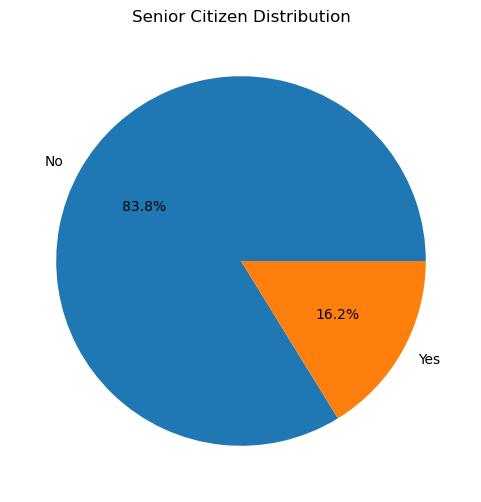

In [10]:
senior_counts = data["Senior Citizen"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(senior_counts, labels=senior_counts.index, autopct="%1.1f%%")
plt.title("Senior Citizen Distribution")
plt.show()

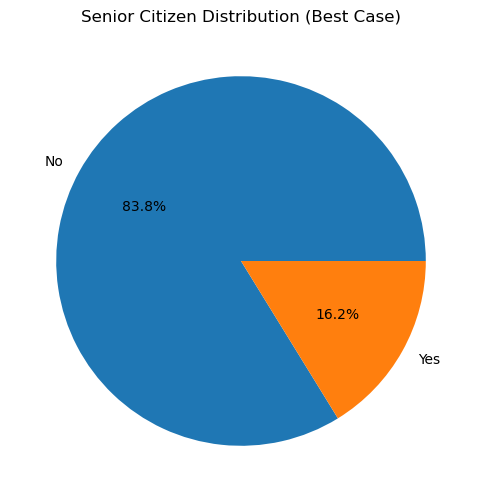

In [11]:
senior_counts1 = data_best["Senior Citizen"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(senior_counts1, labels=senior_counts1.index, autopct="%1.1f%%")
plt.title("Senior Citizen Distribution (Best Case)")
plt.show()

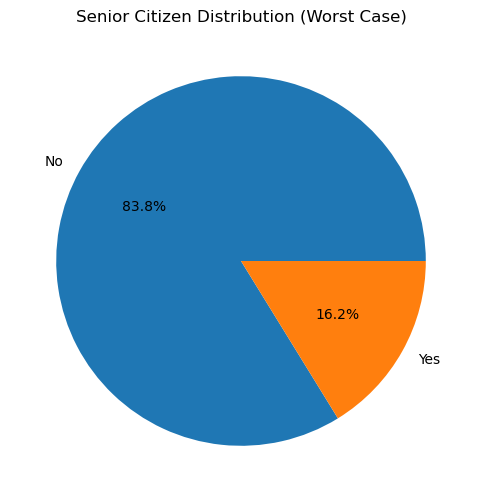

In [12]:
senior_counts2 = data_worst["Senior Citizen"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(senior_counts2, labels=senior_counts2.index, autopct="%1.1f%%")
plt.title("Senior Citizen Distribution (Worst Case)")
plt.show()

In [13]:
senior_crosstab = pd.crosstab(data['Churn Label'], data['Senior Citizen'])
print('Senior Citizen churned - ', senior_crosstab['Yes']['Yes'] / (len(data[data['Senior Citizen'] == 'Yes'])))
print('Non-Senior Citizen churned - ', senior_crosstab['No']['Yes'] / (len(data[data['Senior Citizen'] == 'No'])))
senior_crosstab

Senior Citizen churned -  0.4168126094570928
Non-Senior Citizen churned -  0.23606168446026096


Senior Citizen,No,Yes
Churn Label,,
No,4508,666
Yes,1393,476


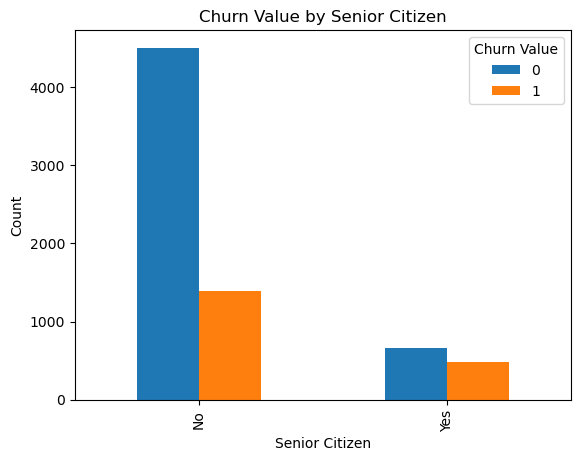

In [14]:
# Bar Chart (Churn value by Gender)
churn_by_senior = data.groupby("Senior Citizen")["Churn Value"].value_counts().unstack()
churn_by_senior.plot(kind="bar", stacked=False)
plt.xlabel("Senior Citizen")
plt.ylabel("Count")
plt.title("Churn Value by Senior Citizen")
plt.show()

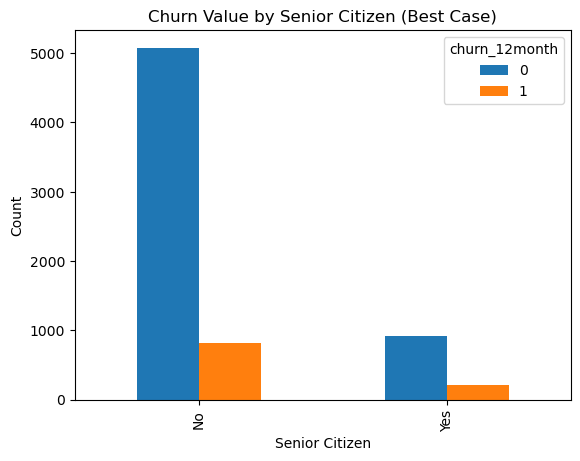

In [15]:
# Bar Chart (Churn value by Gender)
churn_by_senior1 = data_best.groupby("Senior Citizen")["churn_12month"].value_counts().unstack()
churn_by_senior1.plot(kind="bar", stacked=False)
plt.xlabel("Senior Citizen")
plt.ylabel("Count")
plt.title("Churn Value by Senior Citizen (Best Case)")
plt.show()

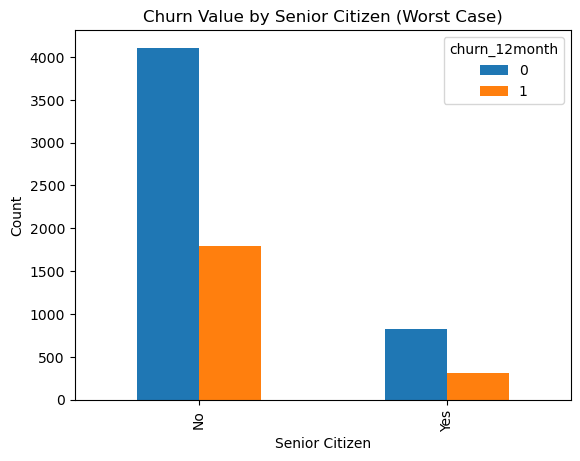

In [16]:
# Bar Chart (Churn value by Gender)
churn_by_senior1 = data_worst.groupby("Senior Citizen")["churn_12month"].value_counts().unstack()
churn_by_senior1.plot(kind="bar", stacked=False)
plt.xlabel("Senior Citizen")
plt.ylabel("Count")
plt.title("Churn Value by Senior Citizen (Worst Case)")
plt.show()

### Partner

In [17]:
data['Partner'].unique()

array(['No', 'Yes'], dtype=object)

In [18]:
data['Partner'].value_counts()

Partner
No     3641
Yes    3402
Name: count, dtype: int64

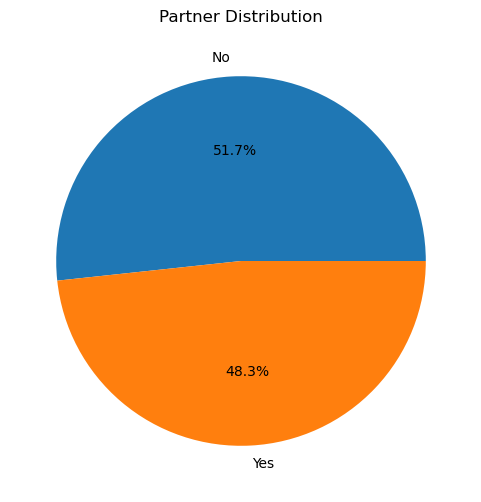

In [19]:
partner_counts = data["Partner"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(partner_counts, labels=partner_counts.index, autopct="%1.1f%%")
plt.title("Partner Distribution")
plt.show()

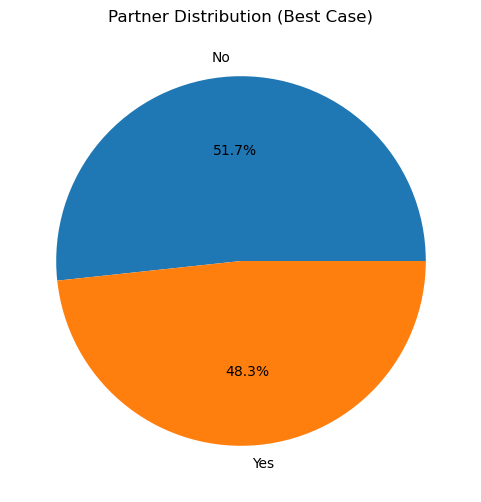

In [20]:
partner_counts = data_best["Partner"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(partner_counts, labels=partner_counts.index, autopct="%1.1f%%")
plt.title("Partner Distribution (Best Case)")
plt.show()

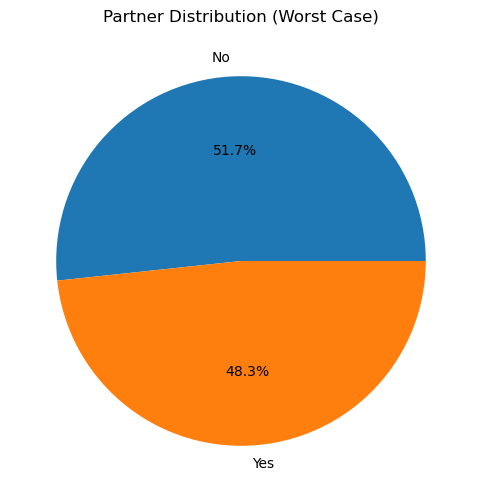

In [21]:
partner_counts = data_worst["Partner"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(partner_counts, labels=partner_counts.index, autopct="%1.1f%%")
plt.title("Partner Distribution (Worst Case)")
plt.show()

In [22]:
partner_crosstab = pd.crosstab(data['Churn Label'], data['Partner'])
print('Partner churned - ', partner_crosstab['Yes']['Yes'] / (len(data[data['Partner'] == 'Yes'])))
print('Non-partner churned - ', partner_crosstab['No']['Yes'] / (len(data[data['Partner'] == 'No'])))
partner_crosstab

Partner churned -  0.1966490299823633
Non-partner churned -  0.32957978577313923


Partner,No,Yes
Churn Label,,
No,2441,2733
Yes,1200,669


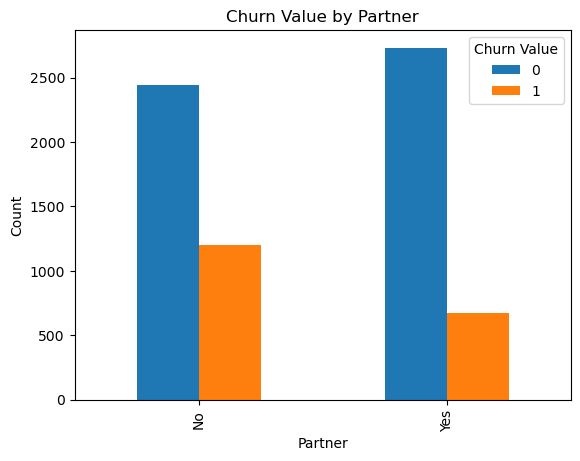

In [23]:
# Bar Chart (Churn value by Partner)
churn_by_partner = data.groupby("Partner")["Churn Value"].value_counts().unstack()
churn_by_partner.plot(kind="bar", stacked=False)
plt.xlabel("Partner")
plt.ylabel("Count")
plt.title("Churn Value by Partner")
plt.show()

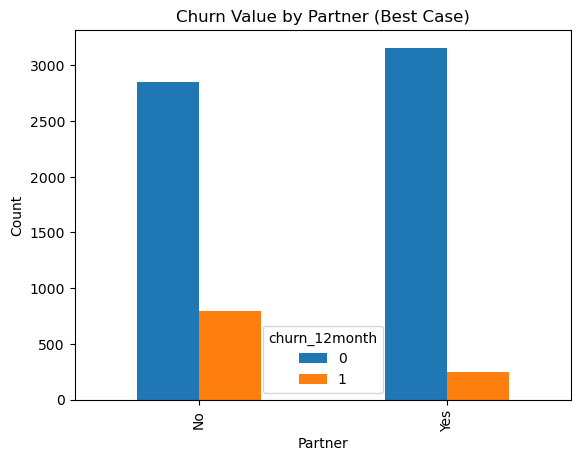

In [24]:
# Bar Chart (Churn value by Partner)
churn_by_partner = data_best.groupby("Partner")["churn_12month"].value_counts().unstack()
churn_by_partner.plot(kind="bar", stacked=False)
plt.xlabel("Partner")
plt.ylabel("Count")
plt.title("Churn Value by Partner (Best Case)")
plt.show()

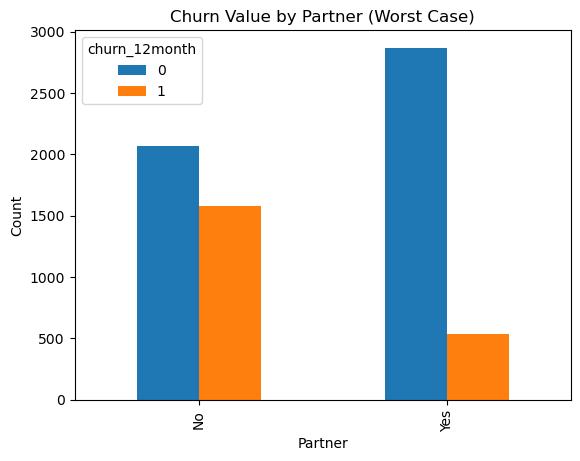

In [25]:
# Bar Chart (Churn value by Partner)
churn_by_partner = data_worst.groupby("Partner")["churn_12month"].value_counts().unstack()
churn_by_partner.plot(kind="bar", stacked=False)
plt.xlabel("Partner")
plt.ylabel("Count")
plt.title("Churn Value by Partner (Worst Case)")
plt.show()

### Gender

In [26]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [27]:
data['Gender'].value_counts()

Gender
Male      3555
Female    3488
Name: count, dtype: int64

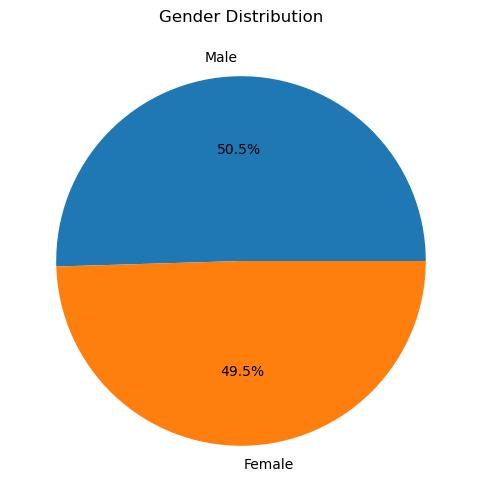

In [28]:
gender_counts = data["Gender"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%")
plt.title("Gender Distribution")
plt.show()

In [29]:
gender_crosstab = pd.crosstab(data['Churn Label'], data['Gender'])
print('Male churned - ', gender_crosstab['Male']['Yes'] / (len(data[data['Gender'] == 'Male'])))
print('Female churned - ', gender_crosstab['Female']['Yes'] / (len(data[data['Gender'] == 'Female'])))
gender_crosstab
# gender_crosstab.keys()

Male churned -  0.2616033755274262
Female churned -  0.26920871559633025


Gender,Female,Male
Churn Label,,
No,2549,2625
Yes,939,930


In [45]:
# # Bar Chart (Churn value by Gender)
# churn_by_gender1 = data_best.groupby("Gender")["churn_12month"].value_counts().unstack()
# churn_by_gender1.plot(kind="bar", stacked=False)
# plt.xlabel("Gender")
# plt.ylabel("Count")
# plt.title("Churn Value by Gender (Best Case)")
# plt.show()

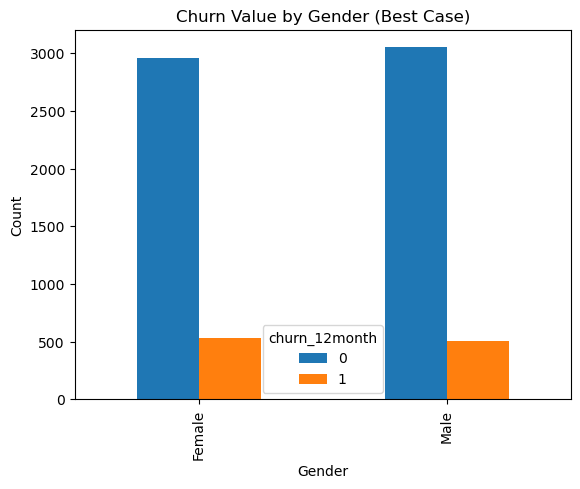

In [31]:
# Bar Chart (Churn value by Gender)
churn_by_partner = data_best.groupby("Gender")["churn_12month"].value_counts().unstack()
churn_by_partner.plot(kind="bar", stacked=False)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Churn Value by Gender (Best Case)")
plt.show()

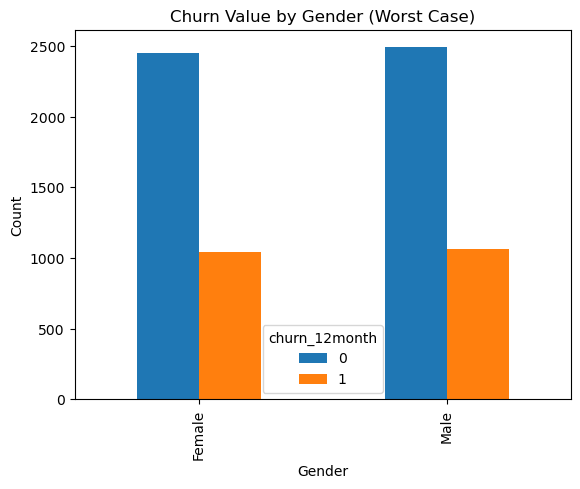

In [32]:
# Bar Chart (Churn value by Gender)
churn_by_partner = data_worst.groupby("Gender")["churn_12month"].value_counts().unstack()
churn_by_partner.plot(kind="bar", stacked=False)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Churn Value by Gender (Worst Case)")
plt.show()

### Dependents

In [33]:
data['Dependents'].unique()

array(['No', 'Yes'], dtype=object)

In [34]:
data['Dependents'].value_counts()

Dependents
No     5416
Yes    1627
Name: count, dtype: int64

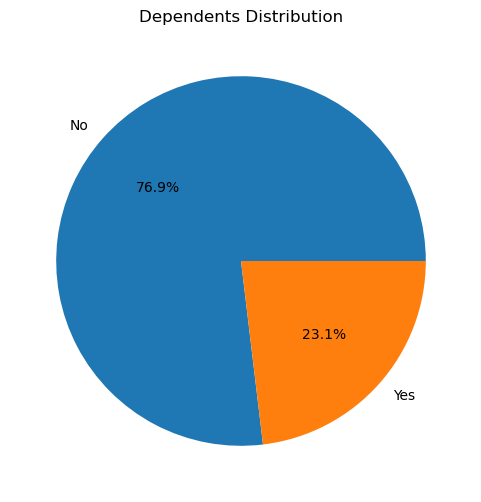

In [35]:
dependent_counts = data["Dependents"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(dependent_counts, labels=dependent_counts.index, autopct="%1.1f%%")
plt.title("Dependents Distribution")
plt.show()

In [36]:
dependents_crosstab = pd.crosstab(data['Churn Label'], data['Dependents'])
print('Dependants churned - ', dependents_crosstab['Yes']['Yes'] / (len(data[data['Dependents'] == 'Yes'])))
print('Non-dependants churned - ', dependents_crosstab['No']['Yes'] / (len(data[data['Dependents'] == 'No'])))
dependents_crosstab

Dependants churned -  0.06515058389674247
Non-dependants churned -  0.3255169867060561


Dependents,No,Yes
Churn Label,,
No,3653,1521
Yes,1763,106


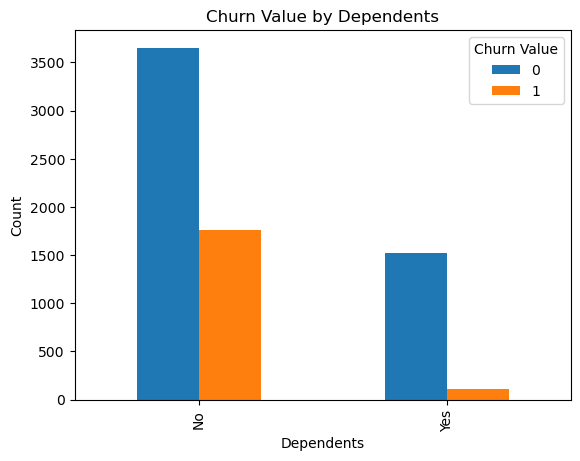

In [37]:
# Bar Chart (Churn value by Dependents)
churn_by_dependents = data.groupby("Dependents")["Churn Value"].value_counts().unstack()
churn_by_dependents.plot(kind="bar", stacked=False)
plt.xlabel("Dependents")
plt.ylabel("Count")
plt.title("Churn Value by Dependents")
plt.show()

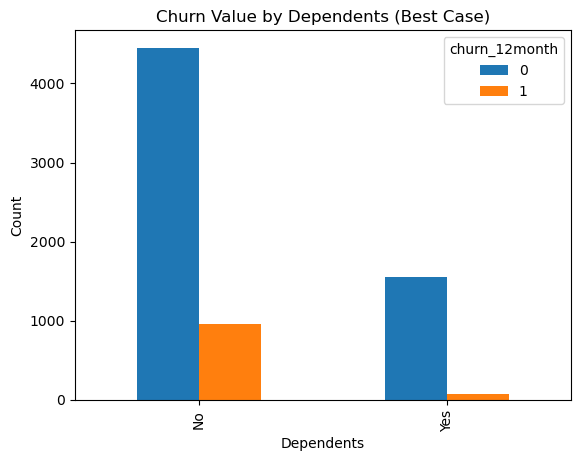

In [43]:
# Bar Chart (Churn value by Dependents)
churn_by_partner = data_best.groupby("Dependents")["churn_12month"].value_counts().unstack()
churn_by_partner.plot(kind="bar", stacked=False)
plt.xlabel("Dependents")
plt.ylabel("Count")
plt.title("Churn Value by Dependents (Best Case)")
plt.show()

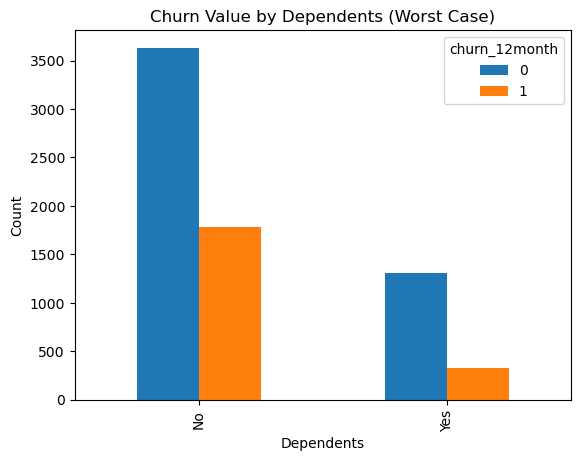

In [39]:
# Bar Chart (Churn value by Dependents)
churn_by_partner = data_worst.groupby("Dependents")["churn_12month"].value_counts().unstack()
churn_by_partner.plot(kind="bar", stacked=False)
plt.xlabel("Dependents")
plt.ylabel("Count")
plt.title("Churn Value by Dependents (Worst Case)")
plt.show()